In [1]:
!pip install git+https://github.com/nimamoradi/Exnn.git

  Cloning https://github.com/nimamoradi/Exnn.git to /tmp/pip-req-build-fje9l2aj
  Running command git clone -q https://github.com/nimamoradi/Exnn.git /tmp/pip-req-build-fje9l2aj
  Created wheel for exnn: filename=exnn-0.3-cp37-none-any.whl size=11655 sha256=f5cd224f9c87b7dea70f2344094768c264c03625c3e9297cd699e709dce61dd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-ejid7885/wheels/3e/3d/47/35b56ab38e130f37f89c40c6e6bc79efc4f583e2dddb2df765
Successfully built exnn


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from exnn import ExNN
from sklearn.svm import LinearSVC, SVC
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.multiclass import OutputCodeClassifier
clf = OutputCodeClassifier(LinearSVC(random_state=0),
                            code_size=2, random_state=0)
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import LinearRegression as EXX_model

In [3]:
iris = load_iris()

In [4]:
from sklearn.model_selection import train_test_split

In [23]:
def data_generator1(datanum, testnum=100, noise_sigma=1, rand_seed=10):
    x, y = iris.data, iris.target
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.5,random_state=rand_seed)
    
    meta_info = {}
    return train_x, test_x, train_y, test_y, meta_info

In [24]:
train_x, test_x, train_y, test_y, meta_info= data_generator1(datanum=10, testnum=10, noise_sigma=1, rand_seed=0)

In [11]:
model = ExNN(
            # meta_info=meta_info,
              subnet_num=10,
               subnet_arch=[10, 6],
               task_type="Regression",
               activation_func=tf.tanh,
               batch_size=min(1000, int(train_x.shape[0] * 0.2)),
               training_epochs=100,
               lr_bp=0.001,
               lr_cl=0.1,
               beta_threshold=0.05,
               tuning_epochs=100,
               l1_proj=0.0001,
               l1_subnet=0.00316,
               l2_smooth=10**(-6),
               verbose=True,
               val_ratio=0.2)



In [33]:
model = EXX_model()

In [10]:
np.int32(train_y)

array([2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1,
       0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 1, 2, 0], dtype=int32)

In [29]:
train_y

array([0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1,
       1, 1, 0, 0, 0, 2, 1, 2, 0])

In [ ]:
train_x

In [ ]:
model.fit(train_x, train_y)


In [35]:
print(__doc__)

from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Automatically created module for IPython interactive environment


In [36]:
# Import some data to play with
from sklearn import svm
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=10)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(y_test[:, i], y_score[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

[0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1
 0] [-0.76301132 -0.20224493  0.11801481 -0.90780855 -0.01116192 -0.6048727
  0.02283491 -0.61076876 -0.37572754 -0.47017411 -0.42224234 -0.3355867
 -0.22723929 -0.07856729 -0.53383361  0.12163662 -0.71356947 -0.55111511
  0.37991331 -0.11107635 -0.70713712 -0.02392675 -0.25045747  0.12675547
 -0.68210402 -0.08001795 -0.03259341 -0.04953425 -0.12974835 -0.19299299
 -0.3619768  -0.22818639 -0.06196433 -0.52455061 -0.40026409 -0.35056585
 -0.05770139 -1.11907501  0.19599366 -0.04299172 -0.48108269  0.1741885
 -0.41416456 -0.01053513  0.01645355 -0.11932181 -0.70817199 -0.77303401
 -0.61489613 -0.96334774 -0.31037723 -0.31952657 -0.35306417  0.12127427
 -0.6643231  -0.55149778 -0.55695146 -0.41111447 -0.49463336  0.06910059
 -0.23036784  0.30342285  0.17642852 -0.1906155  -0.42910413 -0.67759563
 -0.32958811 -0.97119543  0.02088168 -0.081773

In [ ]:
y_train

In [39]:
import matplotlib.pyplot as plt

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

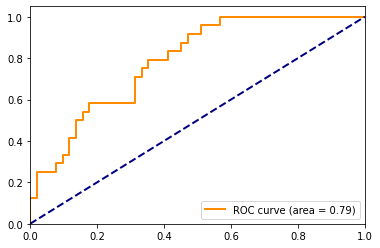

In [40]:
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('')
plt.legend(loc="lower right")
plt.show()

In [41]:
y_score = model.predict(test_x)

In [ ]:
y_score

In [43]:
y_pred = np.int32(np.around(y_score))

In [44]:
test_y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1])

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:

CM = confusion_matrix(test_y, y_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [47]:
score = np.array(y_pred)
y = np.array(test_y)


In [48]:
roc_auc

{0: 0.9126984126984127,
 1: 0.6037037037037037,
 2: 0.7867647058823529,
 'micro': 0.7277333333333333}

In [78]:
# Import some data to play with
from sklearn import svm
iris = load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

In [79]:
y_pred = model.predict(test_x)

In [62]:
y_pred
y_pred = np.int32(np.around(y_pred))
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1], dtype=int32)

In [ ]:
X_test[0]

In [ ]:
test_x

In [71]:
y_test.shape

(75, 3)

In [74]:
one_hot_pred.shape

(75, 3)

In [65]:
one_hot_pred = np.zeros((y_pred.size, y_pred.max()+1))
one_hot_pred[np.arange(y_pred.size),y_pred] = 1
one_hot_pred = np.int32(one_hot_pred)

In [80]:


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    print(y_test[:, i], one_hot_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], one_hot_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), one_hot_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

[0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1
 0] [0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1
 0]
[0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0
 1] [0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0
 1]
[1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0] [1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0]


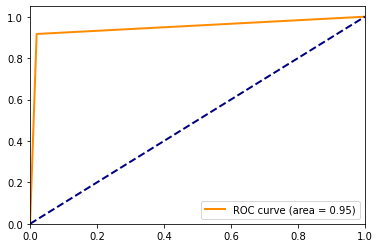

In [81]:
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('')
plt.legend(loc="lower right")
plt.show()